In [ ]:
from pipelines import unet_multitask
from pipeline_config import SOLUTION_CONFIG

pipe = unet_multitask(SOLUTION_CONFIG, train_mode=True)
pipe

In [ ]:
import pandas as pd
meta = pd.read_csv('/mnt/ml-team/dsb_2018/files/stage1_metadata.csv')
meta.head()

In [ ]:
meta_train = meta[meta['is_train']==1]

# K-means clustering of images

In [ ]:
import pandas as pd
meta = pd.read_csv('/mnt/ml-team/dsb_2018/files/stage1_metadata.csv')
meta_train = meta[meta['is_train']==1]
meta_train.head()

In [ ]:
meta_train['vgg_features_clusters'].value_counts()

In [ ]:
import ipywidgets as ipy
import matplotlib.pyplot as plt
%matplotlib inline

n = 10
@ipy.interact(k=ipy.IntSlider(min=0,max=10,value=0,step=1))
def plot(k):
    cluster1 = meta_train[meta_train['vgg_features_clusters']==k]
    random_paths = cluster1.sample(n)['file_path_image'].values

    plt.figure(figsize=(16,10))
    for i,p in enumerate(random_paths):
        plt.subplot(1,n,i+1)
        img = plt.imread(p)
        plt.imshow(img)
    plt.show()

In [ ]:
meta_train['vgg_features_clusters'] = labels

In [ ]:
meta_test = meta[meta['is_train']==0]
meta_test['vgg_features_clusters'] == 
meta_test.head()

https://surabhibhargava.github.io/Detection-and-Segmentation-of-Nuclei-in-Computational-Pathology/
    
    
    
http://openaccess.thecvf.com/content_ICCV_2017/papers/Liu_SGN_Sequential_Grouping_ICCV_2017_paper.pdf

http://www.bioimageanalysis.org/wp/wp-content/uploads/formidable/6/MIMO-Net_Isbi2017.pdf

https://arxiv.org/pdf/1607.04889.pdf

https://www.researchgate.net/profile/Yizhe_Zhang13/publication/319460791_Deep_Adversarial_Networks_for_Biomedical_Image_Segmentation_Utilizing_Unannotated_Images/links/59c9163fa6fdccc71929d61b/Deep-Adversarial-Networks-for-Biomedical-Image-Segmentation-Utilizing-Unannotated-Images.pdf

In [ ]:
from tqdm import tqdm
import numpy as np
from scipy import ndimage as ndi
from scipy.stats import itemfreq
from sklearn.externals import joblib
from skimage.transform import resize
import skimage.morphology as morph

from preparation import train_valid_split

def watershed_combined(image, contour, center):
    mask = np.where(contour + image == 2, 0, image)

    distance = ndi.distance_transform_edt(mask)
    markers, nr_blobs = ndi.label(mask)
    labeled = morph.watershed(-distance, markers, mask=image)

    dropped, _ = ndi.label(image - (labeled > 0))
    dropped = np.where(dropped > 0, dropped + nr_blobs, 0)
    correct_labeled = dropped + labeled

    return correct_labeled
    
mask_threshold = joblib.load('/mnt/ml-team/dsb_2018/kuba/trained_pipelines/unet_multitask/outputs/mask_thresholding')
contour_thresholding = joblib.load('/mnt/ml-team/dsb_2018/kuba/trained_pipelines/unet_multitask/outputs/contour_thresholding')
center_thresholding = joblib.load('/mnt/ml-team/dsb_2018/kuba/trained_pipelines/unet_multitask/outputs/center_thresholding')

for idx in np.random.choice(range(100),50):
    m = mask_threshold['binarized_images'][idx]
    t = contour_thresholding['binarized_images'][idx]
    c = center_thresholding['binarized_images'][idx]
    wc = watershed_combined(m,t,c)
    
    plt.figure(figsize=(16,12))
    plt.subplot(141)
    plt.imshow(m)
    plt.subplot(142)
    plt.imshow(t)
    plt.subplot(143)
    plt.imshow(c)   
    plt.subplot(144)
    plt.imshow(random_colors(wc),cmap='nipy_spectral') 
    plt.show()

In [ ]:
?plt.imsave

100%|██████████| 30/30 [00:00<00:00, 62.65it/s]
/mnt/ml-team/homes/jakub.czakon/.env/dl_py3/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The spectral and spectral_r colormap was deprecated in version 2.0. Use nipy_spectral and nipy_spectral_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


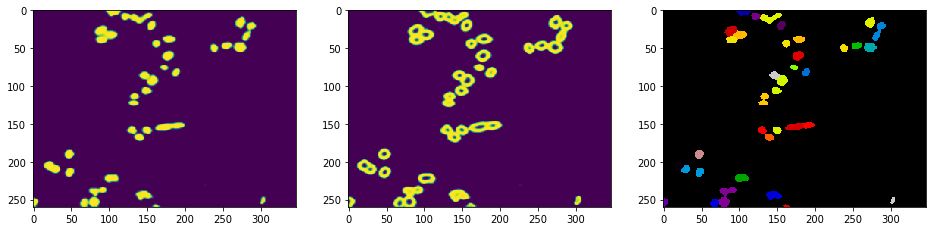

100%|██████████| 101/101 [00:02<00:00, 44.25it/s]


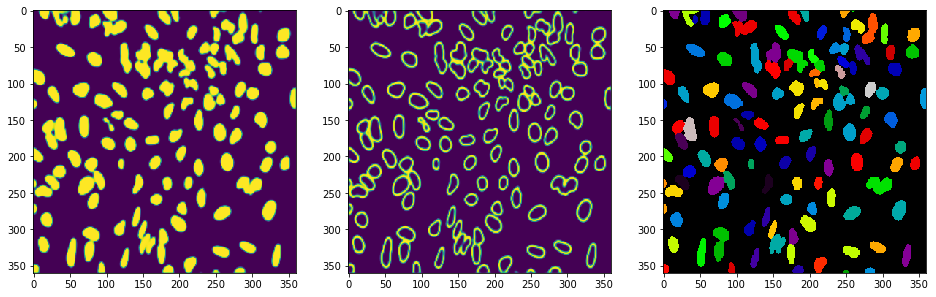

100%|██████████| 15/15 [00:00<00:00, 15.11it/s]


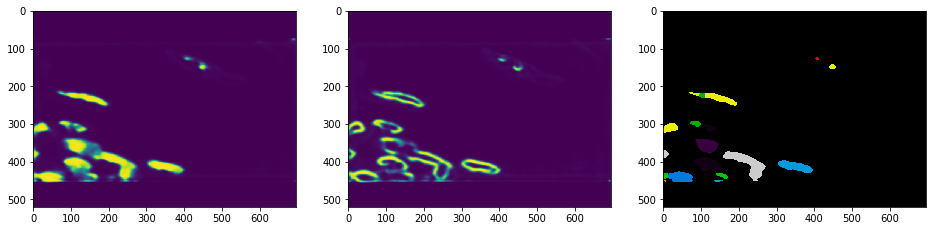

100%|██████████| 104/104 [00:01<00:00, 78.15it/s]


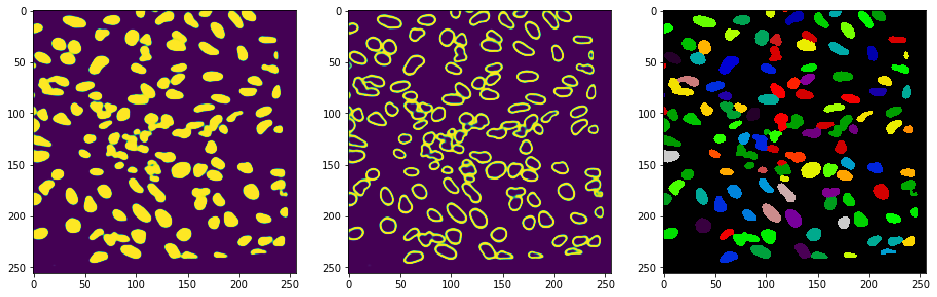

100%|██████████| 7/7 [00:00<00:00, 69.08it/s]


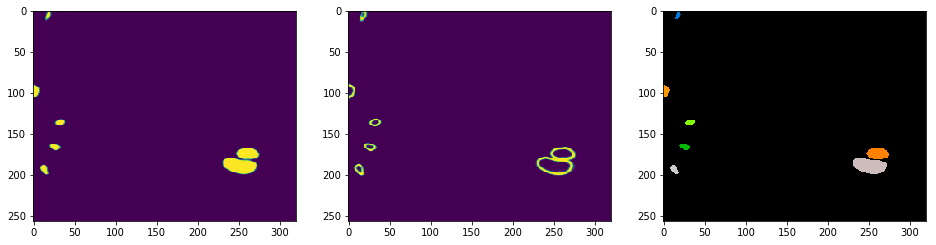

100%|██████████| 38/38 [00:00<00:00, 86.43it/s]


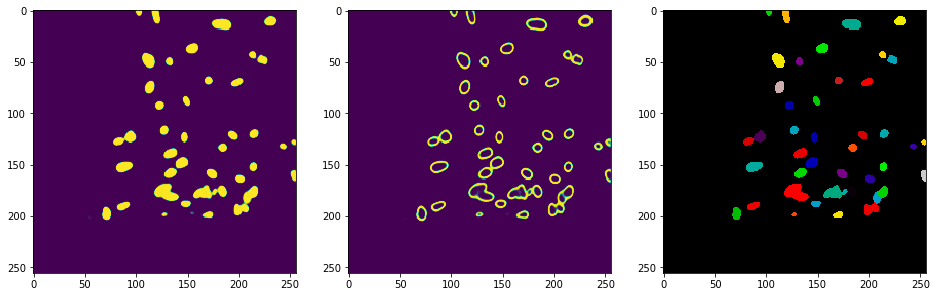

100%|██████████| 5/5 [00:00<00:00, 80.76it/s]


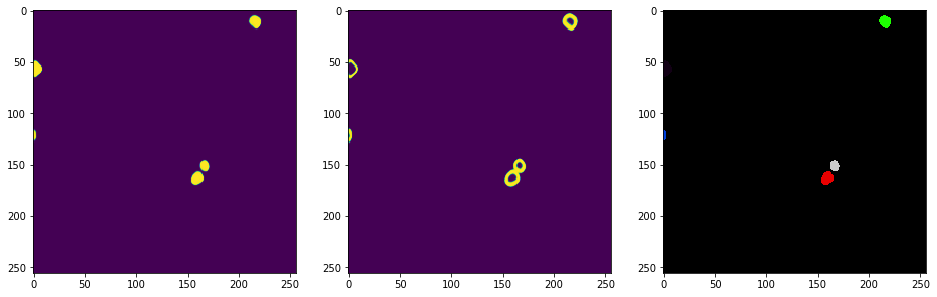

100%|██████████| 22/22 [00:00<00:00, 57.22it/s]


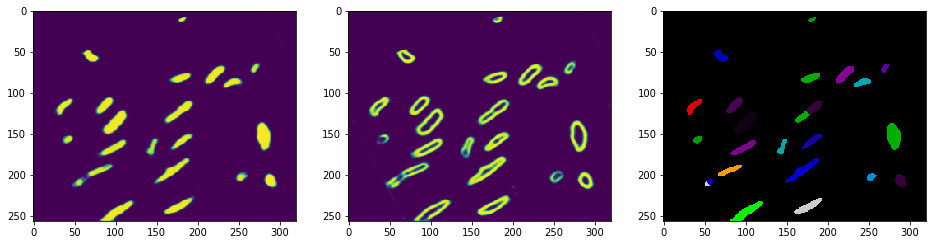

100%|██████████| 39/39 [00:00<00:00, 85.10it/s]


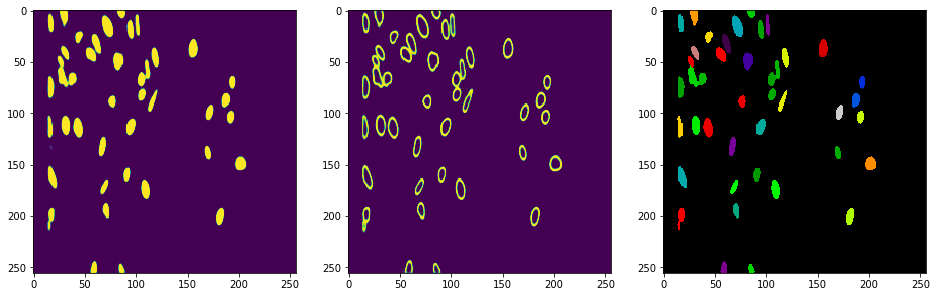

100%|██████████| 8/8 [00:01<00:00,  5.96it/s]


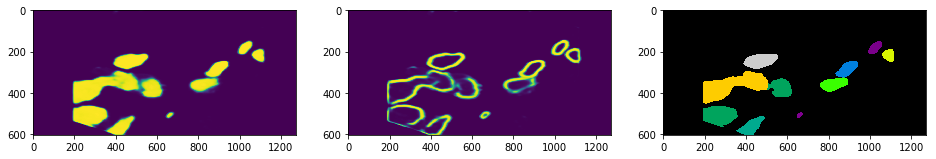

100%|██████████| 27/27 [00:00<00:00, 70.93it/s]


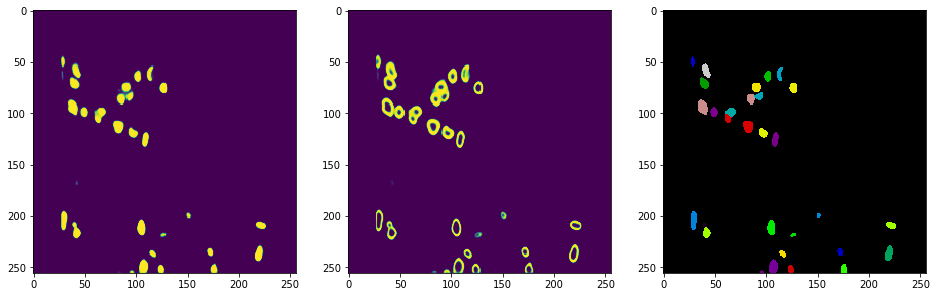

100%|██████████| 97/97 [00:01<00:00, 82.98it/s]


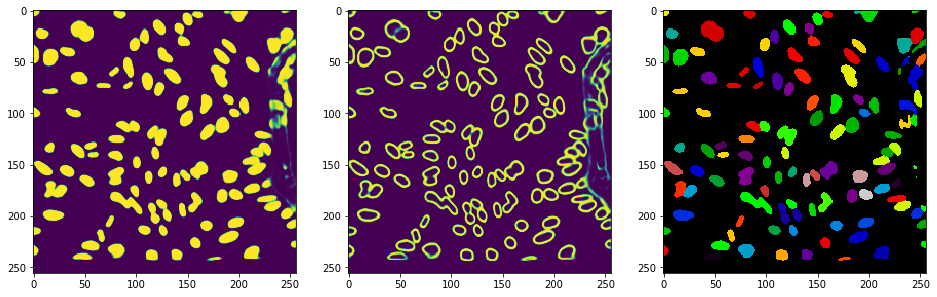

100%|██████████| 10/10 [00:00<00:00, 92.68it/s]


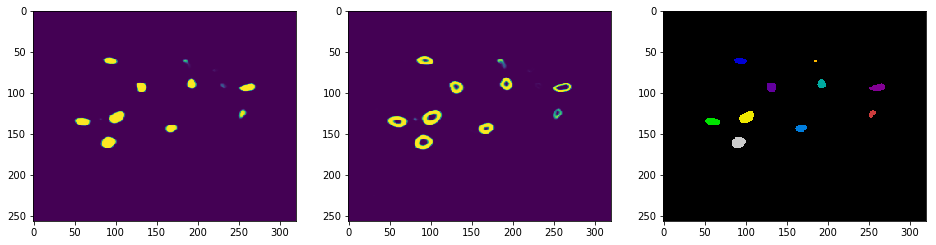

100%|██████████| 13/13 [00:00<00:00, 67.17it/s]


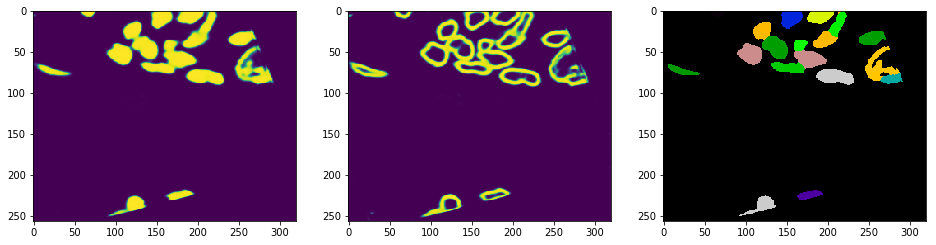

100%|██████████| 67/67 [00:01<00:00, 49.62it/s]


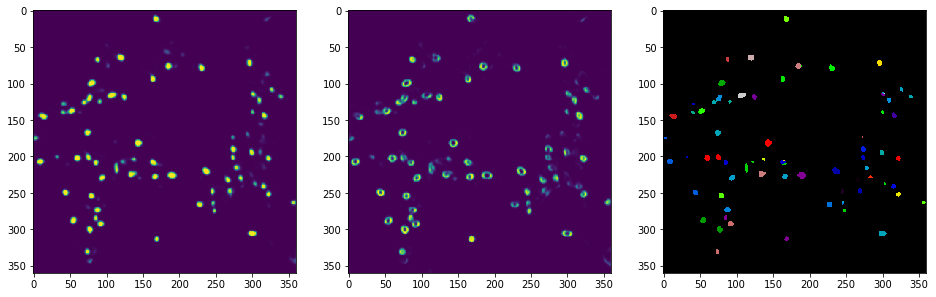

100%|██████████| 17/17 [00:00<00:00, 72.46it/s]


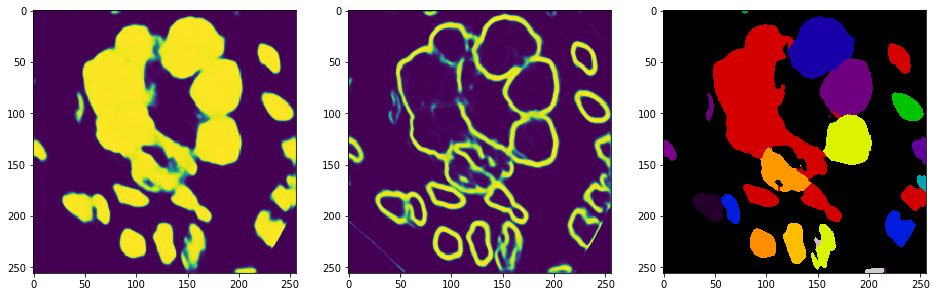

100%|██████████| 6/6 [00:00<00:00, 18.90it/s]


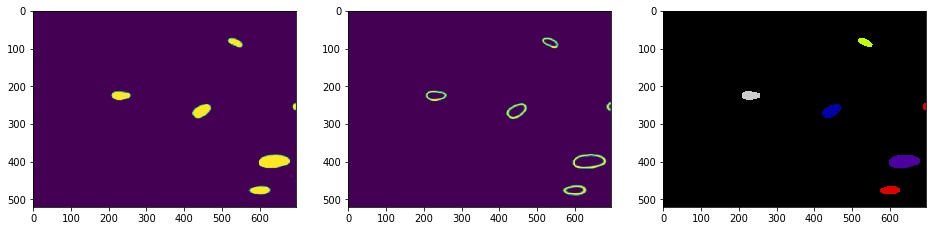

100%|██████████| 12/12 [00:00<00:00, 85.88it/s]


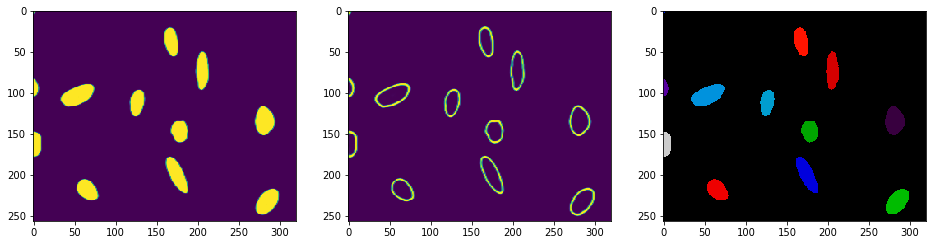

100%|██████████| 9/9 [00:00<00:00, 16.41it/s]


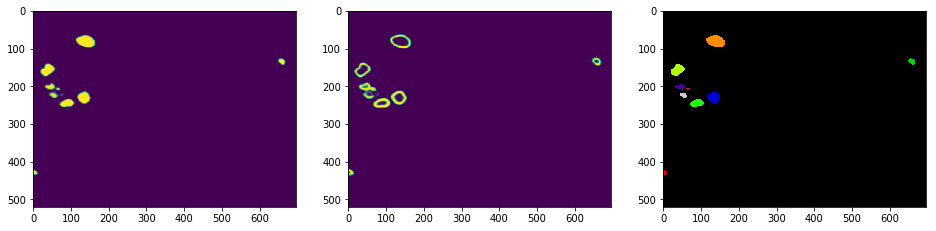

100%|██████████| 15/15 [00:00<00:00, 92.26it/s]


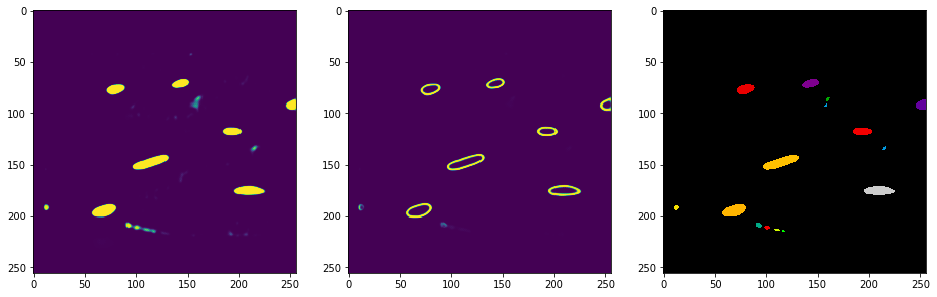

100%|██████████| 17/17 [00:00<00:00, 82.77it/s]


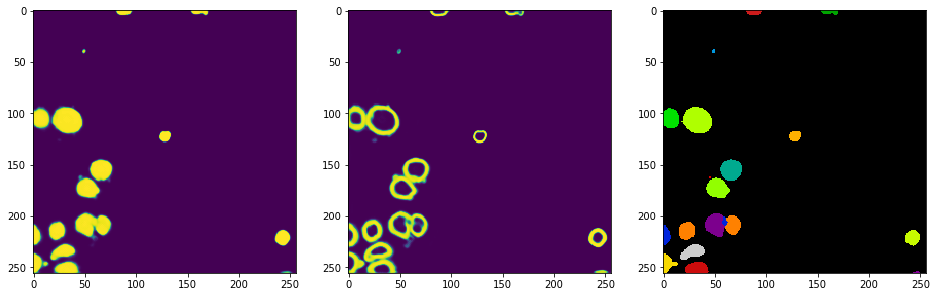

100%|██████████| 5/5 [00:00<00:00, 54.42it/s]


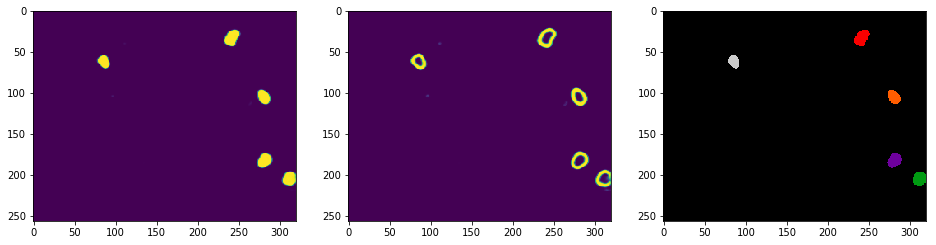

100%|██████████| 62/62 [00:03<00:00, 20.02it/s]


KeyboardInterrupt: 

In [23]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.externals import joblib
from tqdm import tqdm
import numpy as np
from scipy import ndimage as ndi
from scipy.stats import itemfreq
from sklearn.externals import joblib
from skimage.transform import resize
import skimage.morphology as morph
from time import sleep

from scipy.stats import itemfreq
from utils import relabel_random_colors, relabel
from postprocessing import watershed_center, watershed_contour


mask_threshold = joblib.load('/mnt/ml-team/dsb_2018/kuba/trained_pipelines/multitask_augmentations/outputs/mask_resize')
contour_thresholding = joblib.load('/mnt/ml-team/dsb_2018/kuba/trained_pipelines/multitask_augmentations/outputs/contour_resize')
center_thresholding = joblib.load('/mnt/ml-team/dsb_2018/kuba/trained_pipelines/multitask_augmentations/outputs/center_resize')
# watershed_contour = joblib.load('/mnt/ml-team/dsb_2018/kuba/trained_pipelines/multitask_augmentations/outputs/watershed_combined')
# drop_smaller = joblib.load('/mnt/ml-team/dsb_2018/kuba/trained_pipelines/multitask_augmentations/outputs/drop_smaller')

def watershed_combined(mask, boundary, center, area_threshold=0.05):
    markers = (mask > 0.5).astype(np.uint8)
    boundary = (boundary > 0.5).astype(np.uint8)
    center = (center > 0.5).astype(np.uint8)

    initial_nuclei, nr_nuclei = ndi.label(markers)
    
    final_markers = np.zeros_like(markers)
    nr_nuclei_final = 0
    for i in tqdm(range(1,nr_nuclei+1,1)):
        nuclei_marker = (initial_nuclei == i).astype(np.uint8)
        boundary_marker = np.where(nuclei_marker!=0,boundary,0)
        center_marker = np.where(nuclei_marker!=0,center,0)
        water = watershed_contour(nuclei_marker,boundary_marker)
        
        area = nuclei_marker.sum()
        min_nuclei_area = area_threshold*area
        freqs = itemfreq(water)
        to_small_nuclei = freqs[np.where(freqs[:,1]<min_nuclei_area)][:,0]
        largest_nuclei = freqs[freqs[:,1] == freqs[1:,1].max()][0,0]
        for nuclei in to_small_nuclei:
            water = np.where(water==nuclei, largest_nuclei, water)
        
        nr_nuclei_final+=water.max()
        water = np.where(water>0, water + nr_nuclei_final,0)
        final_markers = final_markers + water

    final_markers = relabel(final_markers)
    return final_markers

for idx in range(100):
#     idx = 8
    m = mask_threshold['resized_images'][idx]
    t = contour_thresholding['resized_images'][idx]
    c = center_thresholding['resized_images'][idx]
    p = post_process(m,t,c)

    plt.figure(figsize=(16,12))
    plt.subplot(131)
    plt.imshow(m)
    plt.subplot(132)
    plt.imshow(t) 
    #     plt.subplot(133)
    #     plt.imshow(c)
    plt.subplot(133)
    plt.imshow(relabel_random_colors(p),cmap='spectral')   
    #     plt.subplot(155)
    #     plt.imshow(relabel_random_colors(w2),cmap='spectral')
    plt.show()
